Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

In [1]:
#import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_Salary = pd.read_csv("SalaryData.csv")
df_Salary

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769
5,Doctorate,Sales,219420
6,Doctorate,Sales,237920
7,Doctorate,Sales,160540
8,Doctorate,Sales,180934
9,Doctorate,Prof-specialty,248156


In [3]:
df_Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [4]:
df_Salary.Education = pd.Categorical(df_Salary.Education)
df_Salary.Occupation = pd.Categorical(df_Salary.Occupation)

In [5]:
df_Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Education   40 non-null     category
 1   Occupation  40 non-null     category
 2   Salary      40 non-null     int64   
dtypes: category(2), int64(1)
memory usage: 824.0 bytes


# # Problem 1A

1.State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.


## The Hypothesis for the One Way ANOVA of Education is:
    
## $H_0$: the mean amount of Salary is same for different Education Qualification
## $H_a$: the mean amount of Salary is not same for different Education Qualification

## The Hypothesis for the One Way ANOVA of Occupation is:
    
## $H_0$: the mean amount of Salary is same for different Occupation
## $H_a$: the mean amount of Salary is not same for different Occupation

2.Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.


In [6]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df_Salary).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,30.95628,1.257709e-08
Residual,37.0,6.137256e+10,1.658718e+09,NaN,NaN


The null hypothesis is rejected because P value is less than 0.05. Hence Education is a factor influencing Salary

# 3.Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.


In [7]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df_Salary).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Occupation),3.0,1.125878e+10,3.752928e+09,0.884144,0.458508
Residual,36.0,1.528092e+11,4.244701e+09,NaN,NaN


The null hypothesis is not rejected as the P value is greater than 0.05. Hence, according to this dataset, Occupation is not a factor that influences Salary.

# 4.If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

In [8]:
df_Salary.groupby("Education")["Salary"].mean()

Education
 Bachelors    165152.933333
 Doctorate    208427.000000
 HS-grad       75038.777778
Name: Salary, dtype: float64

<AxesSubplot:xlabel='Education', ylabel='Salary'>

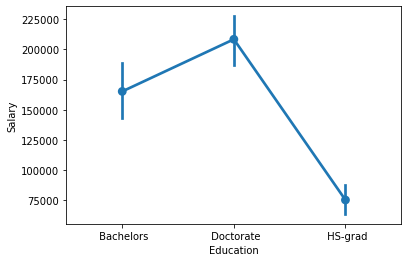

In [9]:
sns.pointplot(x = df_Salary.Education, y = df_Salary.Salary)

<AxesSubplot:xlabel='Education', ylabel='Salary'>

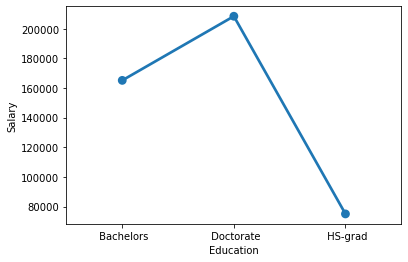

In [10]:
sns.pointplot(x = df_Salary.Education, y = df_Salary.Salary, ci = None)

In [11]:
df_Salary.Education = pd.Categorical(df_Salary.Education)
df_Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Education   40 non-null     category
 1   Occupation  40 non-null     category
 2   Salary      40 non-null     int64   
dtypes: category(2), int64(1)
memory usage: 824.0 bytes


In [12]:
df_Salary_withoutHS = df_Salary[df_Salary.Education !=" HS-grad"]
df_Salary_withoutHS.reset_index(drop = True)

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769
5,Doctorate,Sales,219420
6,Doctorate,Sales,237920
7,Doctorate,Sales,160540
8,Doctorate,Sales,180934
9,Doctorate,Prof-specialty,248156


In [13]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df_Salary_withoutHS).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.467428e+10,7.337138e+09,3.654473,0.038421
Residual,29.0,5.822372e+10,2.007714e+09,NaN,NaN


In [14]:
df_Salary_withoutDoc = df_Salary[df_Salary.Education !=" Doctorate"]

In [15]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df_Salary_withoutDoc).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,4.568198e+10,2.284099e+10,14.979273,0.000078
Residual,22.0,3.354648e+10,1.524840e+09,NaN,NaN


In [16]:
df_Salary_without_Bac = df_Salary[df_Salary.Education != " Bachelors"]

In [17]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df_Salary_without_Bac).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.025348e+11,5.126742e+10,38.06791,5.049149e-08
Residual,23.0,3.097492e+10,1.346736e+09,NaN,NaN


# 5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

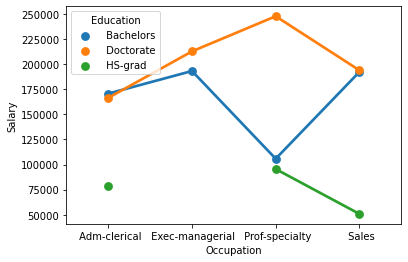

In [18]:
sns.pointplot(x = df_Salary.Occupation, y = df_Salary.Salary, hue = df_Salary.Education, ci = None)

# 6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

## The Hypothesis for the TWO Way ANOVA  is:
    
## $H_0$: there is no interaction between Education and Occupation
## $H_a$: the is an interaction between Education and Occupation

In [19]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):(Occupation)'
model = ols(formula, df_Salary_withoutDoc).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,4.568198e+10,2.284099e+10,38.064992,5.266897e-07
C(Occupation),3.0,8.315912e+09,2.771971e+09,4.619547,1.537164e-02
C(Education):Occupation,9.0,2.256789e+10,2.507544e+09,4.178874,5.458959e-03
Residual,17.0,1.020089e+10,6.000525e+08,NaN,NaN


7 Explain the business implications of performing ANOVA for this particular case study.

The business implication of performing ANOVA points in the direction that there is not only interaction between Education and Occupation on Salary but Education itself plays and influential role in determining the salary. Hence, we need to further analyse and do more data analysis to understand the exact role played by them.

1. Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?


We will explore the Education Data set and perform the exploratory data analysis on the dataset. The major topics to be covered are below:

Removing duplicates
Missing value treatment
Outlier Treatment
Normalization and Scaling( Numerical Variables)
Encoding Categorical variables( Dummy Variables)
Univerate Analysis
Bivariate Analysis

In [20]:
df_Edu = pd.read_csv("Education+-+Post+12th+Standard.csv")
df_Edu.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [21]:
df_Edu.shape

(777, 18)

In [22]:
df_Edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [23]:
dups = df_Edu.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


# Univarate Analysis

In [24]:
df_Edu.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


<AxesSubplot:xlabel='Expend'>

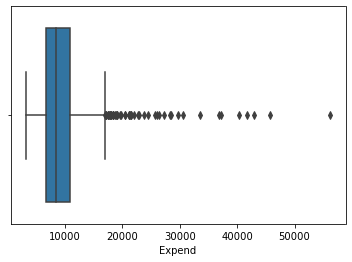

In [25]:
sns.boxplot(x = df_Edu.Expend)

<AxesSubplot:xlabel='PhD', ylabel='Count'>

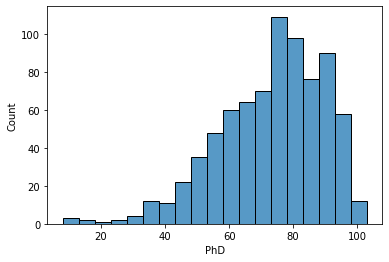

In [26]:
sns.histplot(df_Edu.PhD)

<AxesSubplot:xlabel='Terminal', ylabel='Count'>

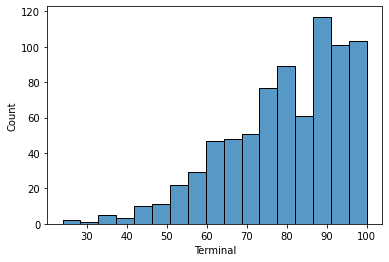

In [27]:
sns.histplot(df_Edu.Terminal)

In [28]:
#total applications received in an year
df_Edu.Apps.sum()

2332273

In [29]:
#total number of applications accepted
df_Edu.Accept.sum()

1568611

In [30]:
#total number of students enorlled
df_Edu.Enroll.sum()

606039

<AxesSubplot:xlabel='Grad.Rate', ylabel='Count'>

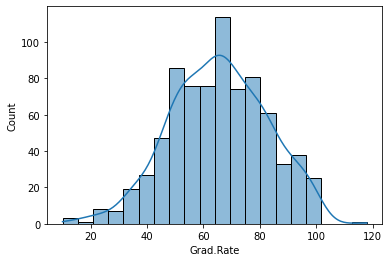

In [31]:
sns.histplot(df_Edu["Grad.Rate"], kde = True)

In [32]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df_Edu[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df_Edu[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_Edu[column])
    plt.show()

In [33]:
#droping SF columns
df_Edu.drop("S.F.Ratio", axis = 1, inplace = True)

In [34]:
df_Edu.iloc[:,1:].columns.values

array(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'perc.alumni', 'Expend',
       'Grad.Rate'], dtype=object)

Description of Apps
----------------------------------------------------------------------------
count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64 Distribution of Apps
----------------------------------------------------------------------------


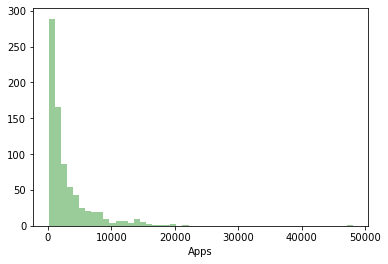

BoxPlot of Apps
----------------------------------------------------------------------------


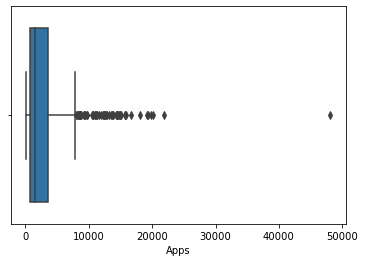

Description of Accept
----------------------------------------------------------------------------
count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accept, dtype: float64 Distribution of Accept
----------------------------------------------------------------------------


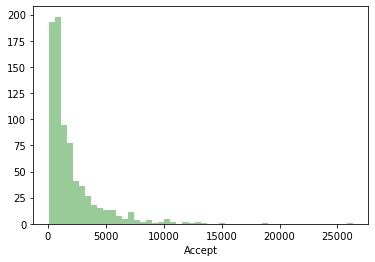

BoxPlot of Accept
----------------------------------------------------------------------------


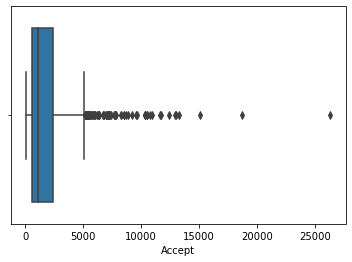

Description of Enroll
----------------------------------------------------------------------------
count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Enroll, dtype: float64 Distribution of Enroll
----------------------------------------------------------------------------


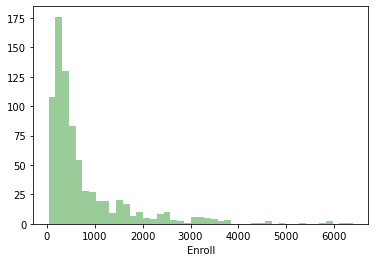

BoxPlot of Enroll
----------------------------------------------------------------------------


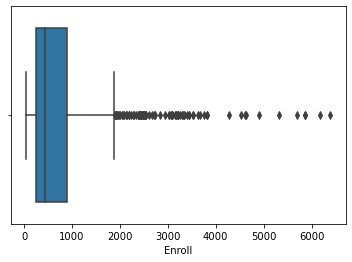

Description of Top10perc
----------------------------------------------------------------------------
count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64 Distribution of Top10perc
----------------------------------------------------------------------------


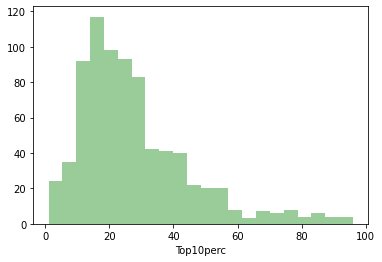

BoxPlot of Top10perc
----------------------------------------------------------------------------


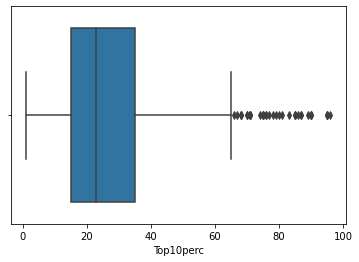

Description of Top25perc
----------------------------------------------------------------------------
count    777.000000
mean      55.796654
std       19.804778
min        9.000000
25%       41.000000
50%       54.000000
75%       69.000000
max      100.000000
Name: Top25perc, dtype: float64 Distribution of Top25perc
----------------------------------------------------------------------------


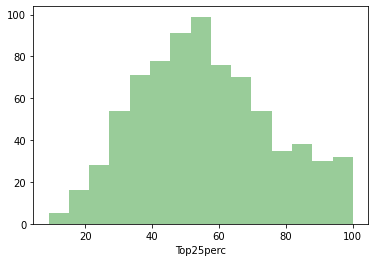

BoxPlot of Top25perc
----------------------------------------------------------------------------


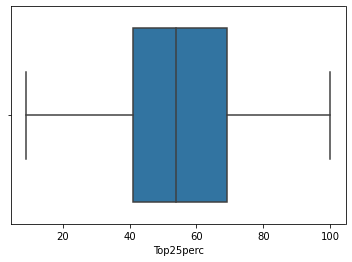

Description of F.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: F.Undergrad, dtype: float64 Distribution of F.Undergrad
----------------------------------------------------------------------------


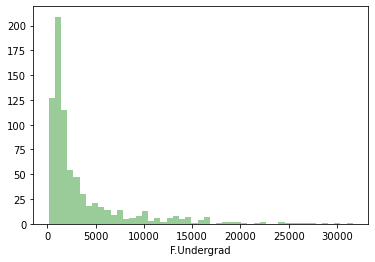

BoxPlot of F.Undergrad
----------------------------------------------------------------------------


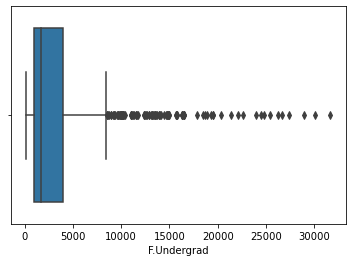

Description of P.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean       855.298584
std       1522.431887
min          1.000000
25%         95.000000
50%        353.000000
75%        967.000000
max      21836.000000
Name: P.Undergrad, dtype: float64 Distribution of P.Undergrad
----------------------------------------------------------------------------


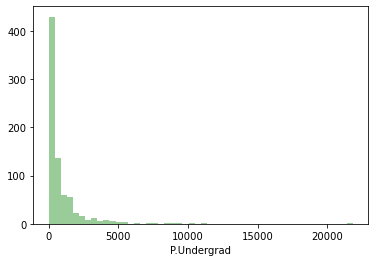

BoxPlot of P.Undergrad
----------------------------------------------------------------------------


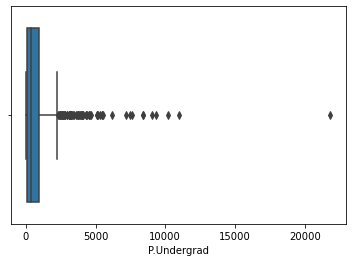

Description of Outstate
----------------------------------------------------------------------------
count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64 Distribution of Outstate
----------------------------------------------------------------------------


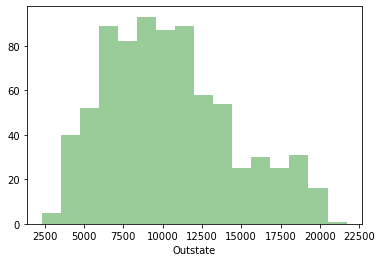

BoxPlot of Outstate
----------------------------------------------------------------------------


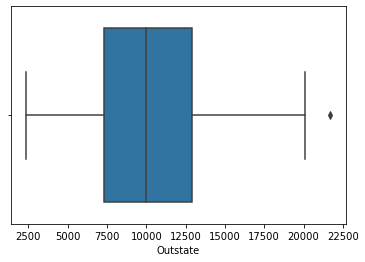

Description of Room.Board
----------------------------------------------------------------------------
count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: Room.Board, dtype: float64 Distribution of Room.Board
----------------------------------------------------------------------------


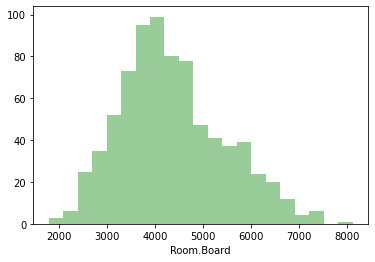

BoxPlot of Room.Board
----------------------------------------------------------------------------


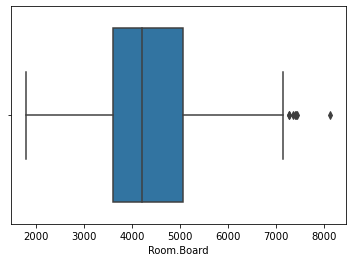

Description of Books
----------------------------------------------------------------------------
count     777.000000
mean      549.380952
std       165.105360
min        96.000000
25%       470.000000
50%       500.000000
75%       600.000000
max      2340.000000
Name: Books, dtype: float64 Distribution of Books
----------------------------------------------------------------------------


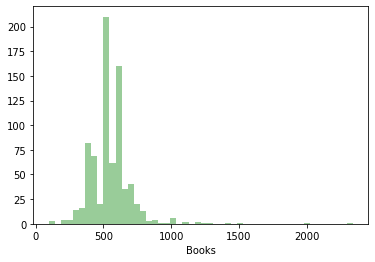

BoxPlot of Books
----------------------------------------------------------------------------


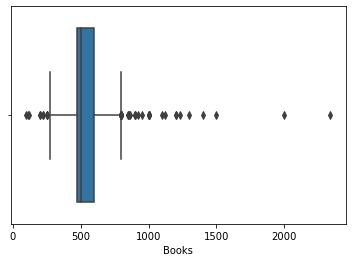

Description of Personal
----------------------------------------------------------------------------
count     777.000000
mean     1340.642214
std       677.071454
min       250.000000
25%       850.000000
50%      1200.000000
75%      1700.000000
max      6800.000000
Name: Personal, dtype: float64 Distribution of Personal
----------------------------------------------------------------------------


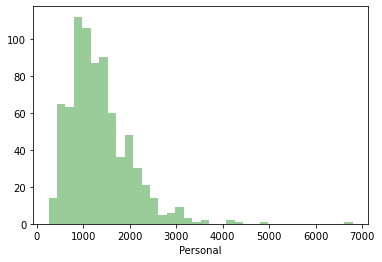

BoxPlot of Personal
----------------------------------------------------------------------------


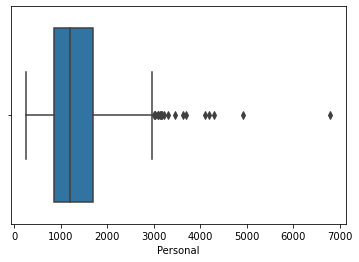

Description of PhD
----------------------------------------------------------------------------
count    777.000000
mean      72.660232
std       16.328155
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      103.000000
Name: PhD, dtype: float64 Distribution of PhD
----------------------------------------------------------------------------


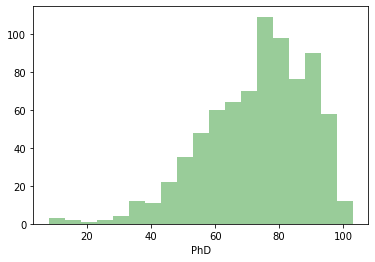

BoxPlot of PhD
----------------------------------------------------------------------------


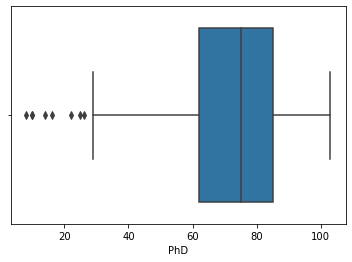

Description of Terminal
----------------------------------------------------------------------------
count    777.000000
mean      79.702703
std       14.722359
min       24.000000
25%       71.000000
50%       82.000000
75%       92.000000
max      100.000000
Name: Terminal, dtype: float64 Distribution of Terminal
----------------------------------------------------------------------------


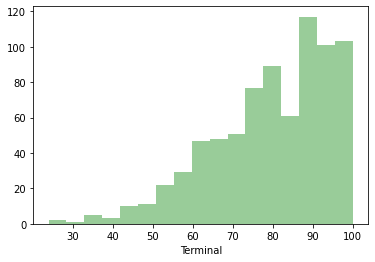

BoxPlot of Terminal
----------------------------------------------------------------------------


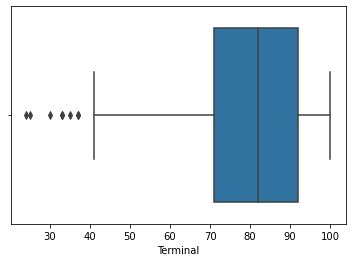

Description of perc.alumni
----------------------------------------------------------------------------
count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: perc.alumni, dtype: float64 Distribution of perc.alumni
----------------------------------------------------------------------------


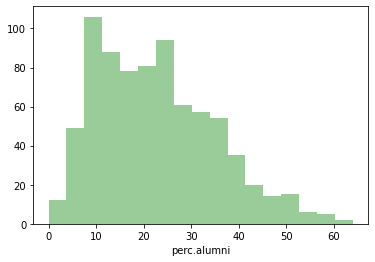

BoxPlot of perc.alumni
----------------------------------------------------------------------------


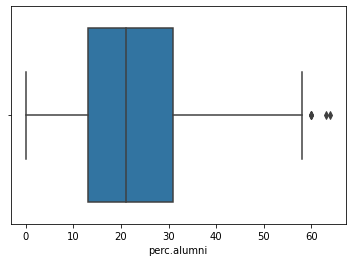

Description of Expend
----------------------------------------------------------------------------
count      777.000000
mean      9660.171171
std       5221.768440
min       3186.000000
25%       6751.000000
50%       8377.000000
75%      10830.000000
max      56233.000000
Name: Expend, dtype: float64 Distribution of Expend
----------------------------------------------------------------------------


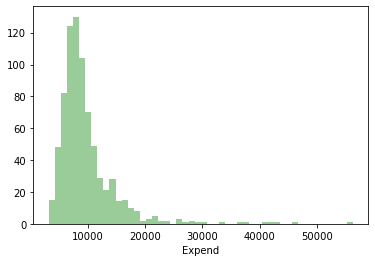

BoxPlot of Expend
----------------------------------------------------------------------------


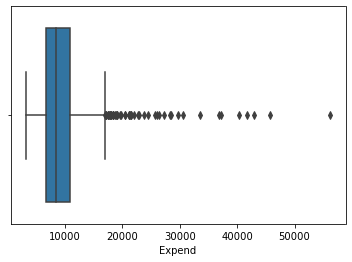

Description of Grad.Rate
----------------------------------------------------------------------------
count    777.00000
mean      65.46332
std       17.17771
min       10.00000
25%       53.00000
50%       65.00000
75%       78.00000
max      118.00000
Name: Grad.Rate, dtype: float64 Distribution of Grad.Rate
----------------------------------------------------------------------------


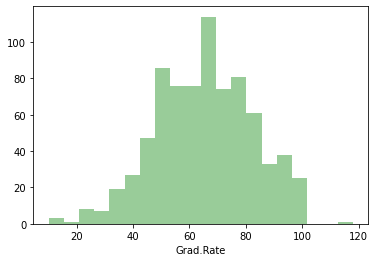

BoxPlot of Grad.Rate
----------------------------------------------------------------------------


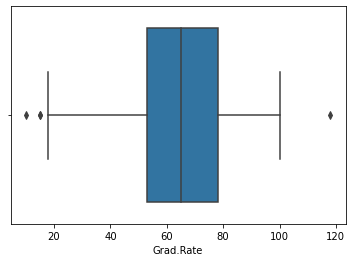

In [35]:
for x in df_Edu.iloc[:,1:].columns.values:
    univariateAnalysis_numeric(x,20)

# Bivarate Analysis

In [36]:
print(df_Edu.corr().values)

[[ 1.          0.94345057  0.84682205  0.33883368  0.3516399   0.81449058
   0.39826427  0.05015903  0.16493896  0.1325586   0.17873085  0.39069733
   0.36949147 -0.09022589  0.25959198  0.1467546 ]
 [ 0.94345057  1.          0.91163666  0.19244693  0.24747574  0.87422328
   0.44127073 -0.02575455  0.09089863  0.11352535  0.20098867  0.35575788
   0.33758337 -0.15998987  0.12471701  0.06731255]
 [ 0.84682205  0.91163666  1.          0.18129353  0.22674511  0.96463965
   0.5130686  -0.15547734 -0.04023168  0.11271089  0.28092946  0.33146914
   0.30827407 -0.18079413  0.06416923 -0.02234104]
 [ 0.33883368  0.19244693  0.18129353  1.          0.89199497  0.14128873
  -0.10535628  0.56233054  0.37148038  0.11885843 -0.0933164   0.53182802
   0.49113502  0.45548526  0.66091341  0.49498923]
 [ 0.3516399   0.24747574  0.22674511  0.89199497  1.          0.19944466
  -0.05357664  0.48939383  0.33148989  0.11552713 -0.08081027  0.54586221
   0.52474884  0.41786429  0.52744743  0.47728116]
 [ 0.

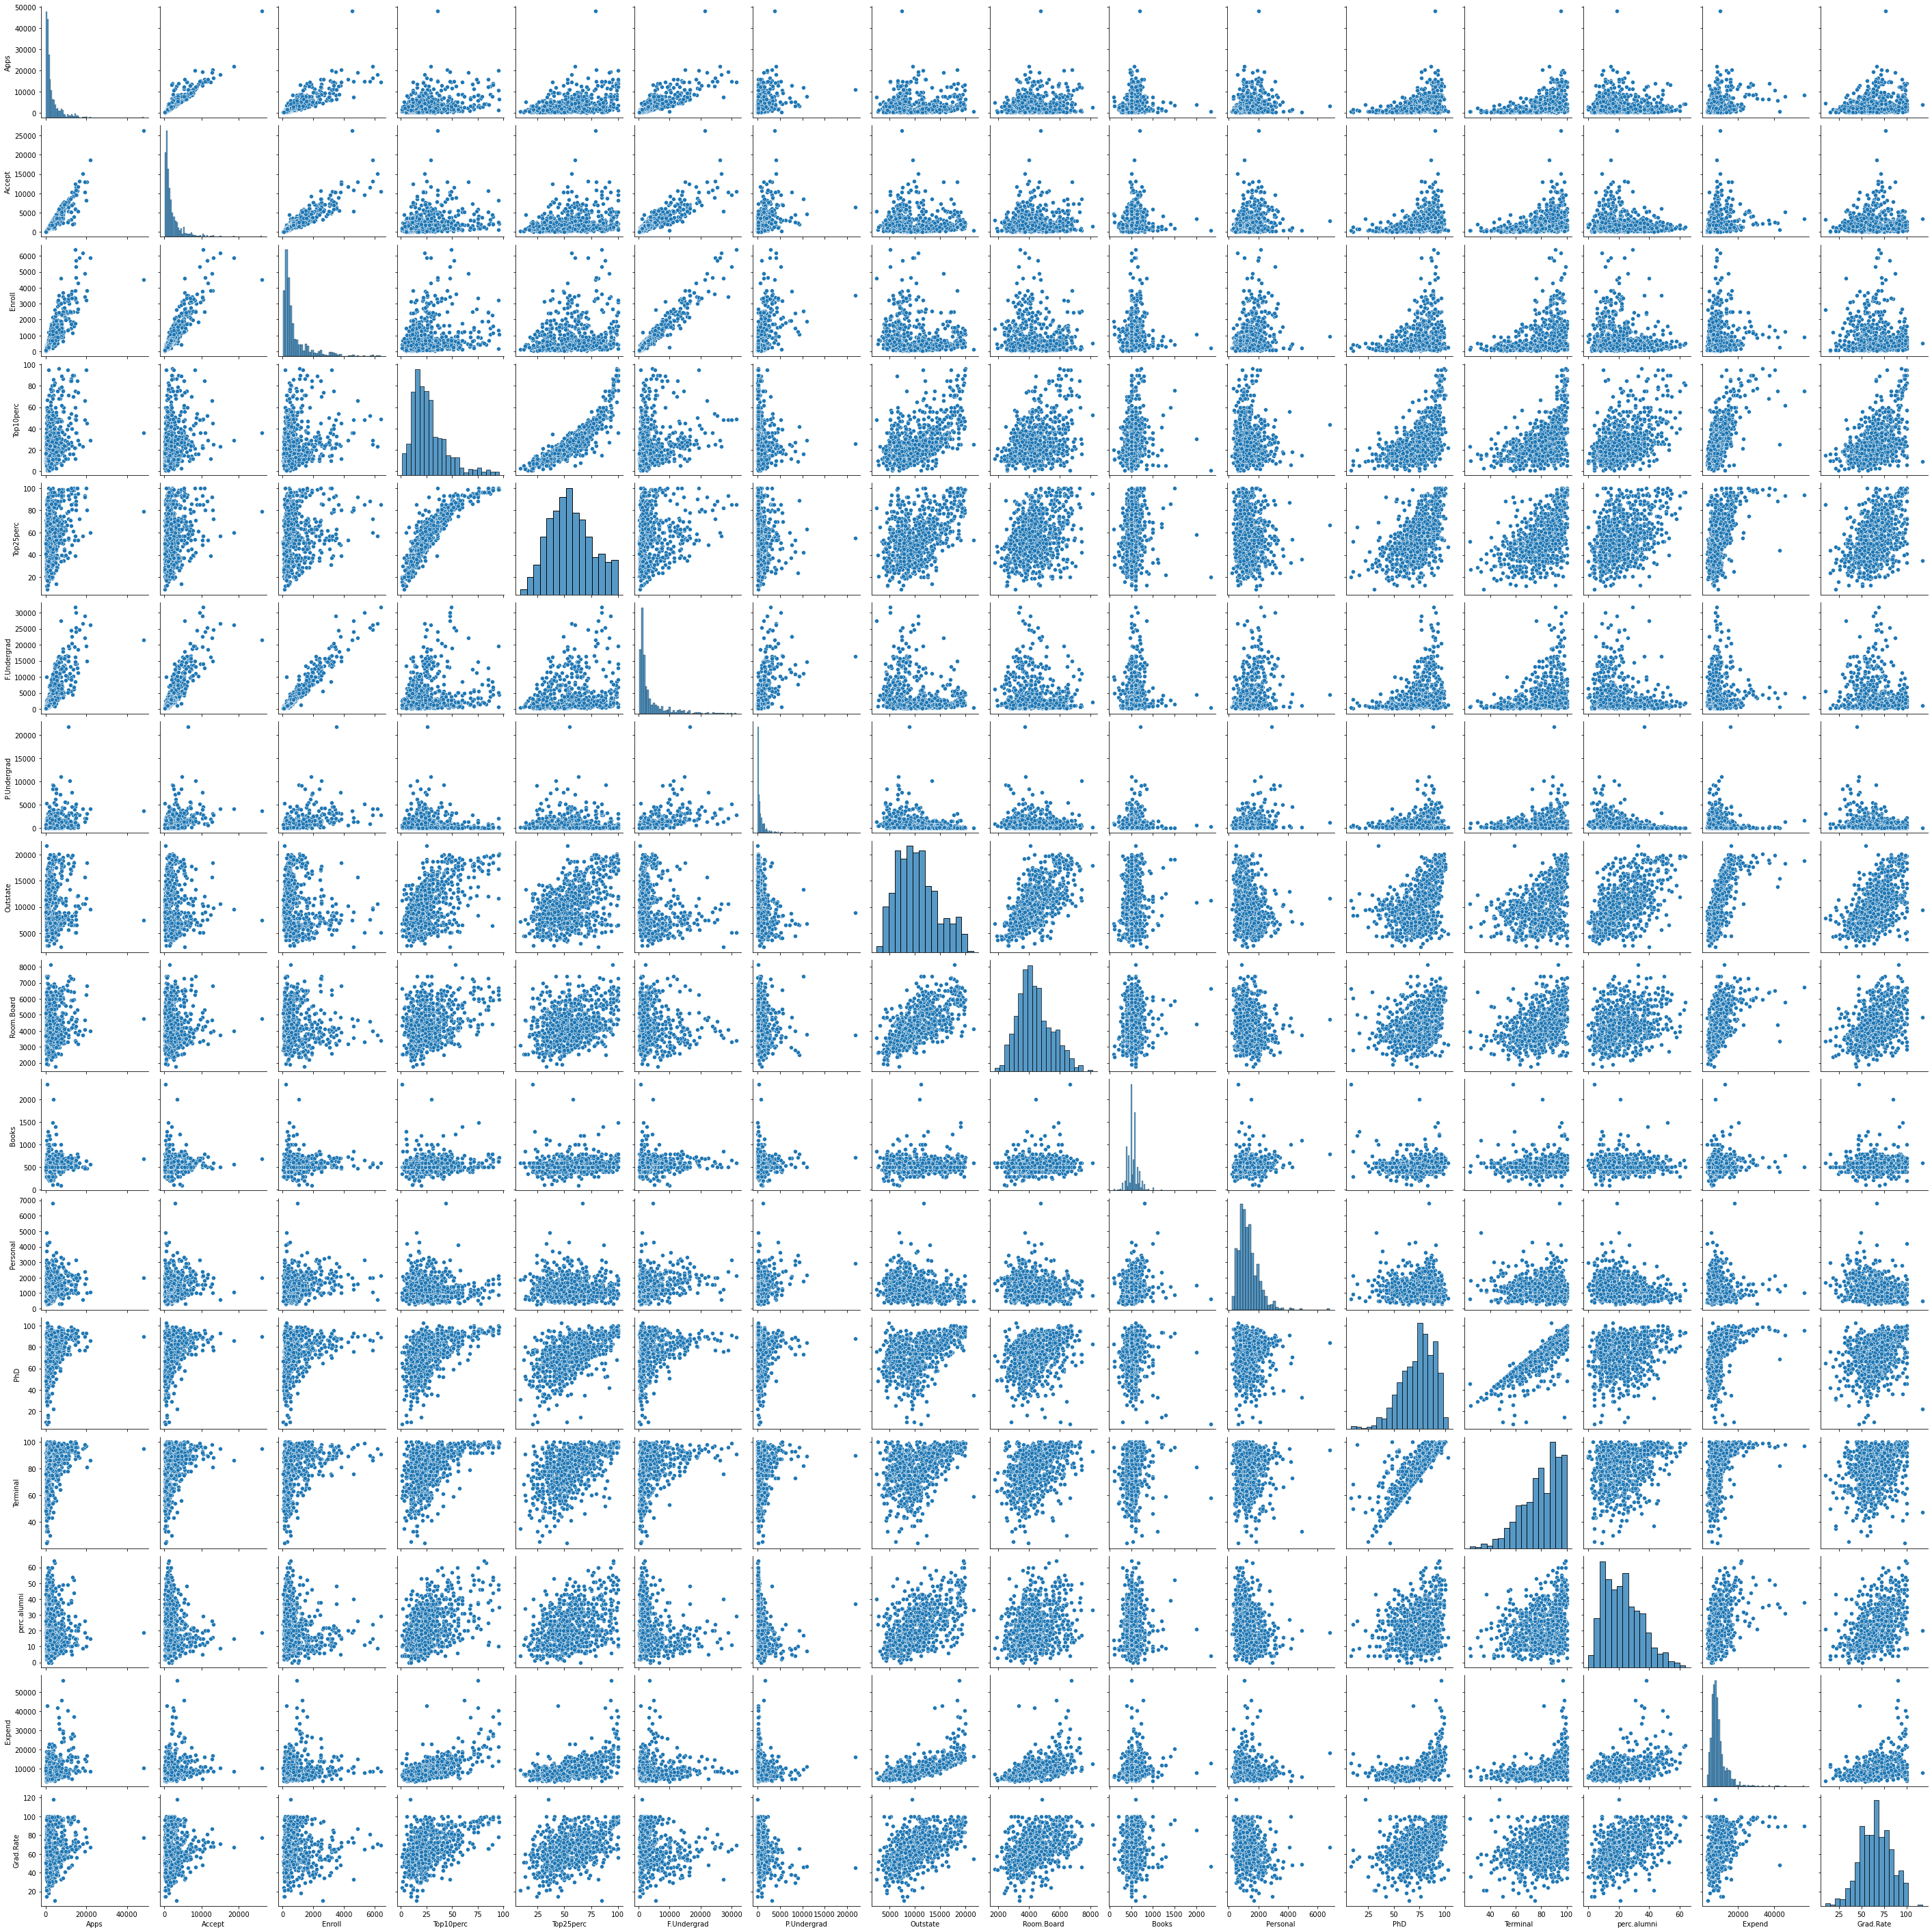

In [37]:
sns.pairplot(df_Edu)

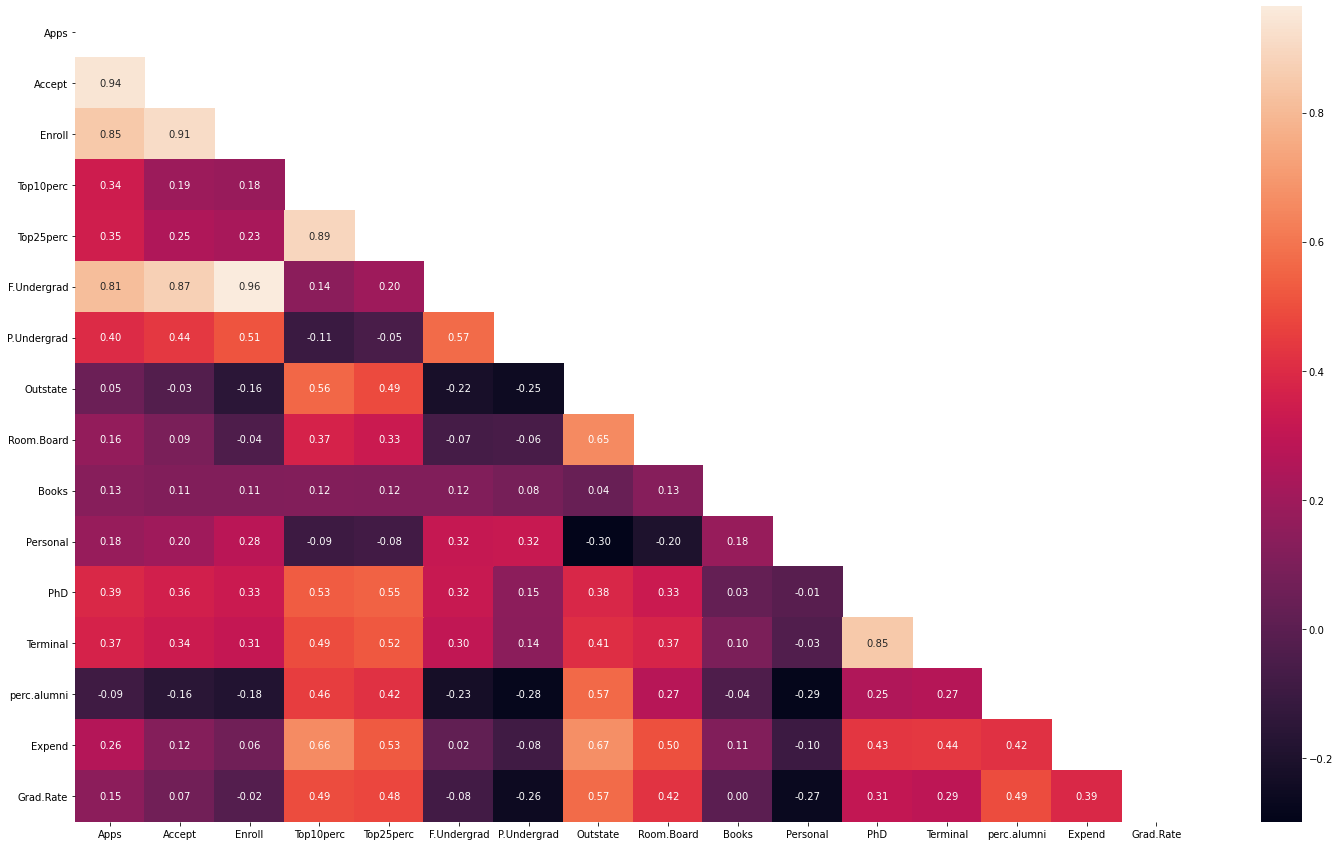

In [38]:
mask = np.triu(np.ones_like(df_Edu.corr(), dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_Edu.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

In [39]:
df_Edu_without_Name = df_Edu.iloc[:,1:]
df_Edu_without_Name

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,14,4469,40
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,31,9189,83
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,20,8323,49
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,49,40386,99


# Is scaling necessary for PCA in this case? Give justification and perform scaling.


In [40]:
from scipy.stats import zscore
df_Edu_Scaled=df_Edu_without_Name.apply(zscore)
df_Edu_Scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-1.675079,0.241803,-2.939613


<AxesSubplot:>

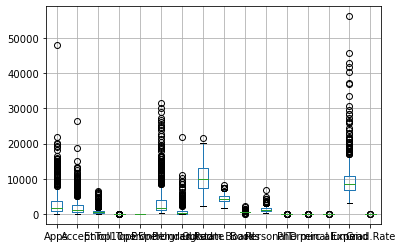

In [41]:
df_Edu.boxplot()

<AxesSubplot:>

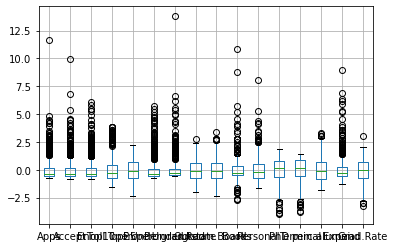

In [42]:
df_Edu_Scaled.boxplot()

# Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].


In [43]:
cov_matrix = np.cov(df_Edu_Scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184  -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441  0.54656564
   0.52542506  0.41840277  0.528127

In [44]:
cor_matrix = np.corrcoef(df_Edu_Scaled.T)
print('Correlation Matrix \n%s', cor_matrix)

Correlation Matrix 
%s [[ 1.          0.94345057  0.84682205  0.33883368  0.3516399   0.81449058
   0.39826427  0.05015903  0.16493896  0.1325586   0.17873085  0.39069733
   0.36949147 -0.09022589  0.25959198  0.1467546 ]
 [ 0.94345057  1.          0.91163666  0.19244693  0.24747574  0.87422328
   0.44127073 -0.02575455  0.09089863  0.11352535  0.20098867  0.35575788
   0.33758337 -0.15998987  0.12471701  0.06731255]
 [ 0.84682205  0.91163666  1.          0.18129353  0.22674511  0.96463965
   0.5130686  -0.15547734 -0.04023168  0.11271089  0.28092946  0.33146914
   0.30827407 -0.18079413  0.06416923 -0.02234104]
 [ 0.33883368  0.19244693  0.18129353  1.          0.89199497  0.14128873
  -0.10535628  0.56233054  0.37148038  0.11885843 -0.0933164   0.53182802
   0.49113502  0.45548526  0.66091341  0.49498923]
 [ 0.3516399   0.24747574  0.22674511  0.89199497  1.          0.19944466
  -0.05357664  0.48939383  0.33148989  0.11552713 -0.08081027  0.54586221
   0.52474884  0.41786429  0.5274

# Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]


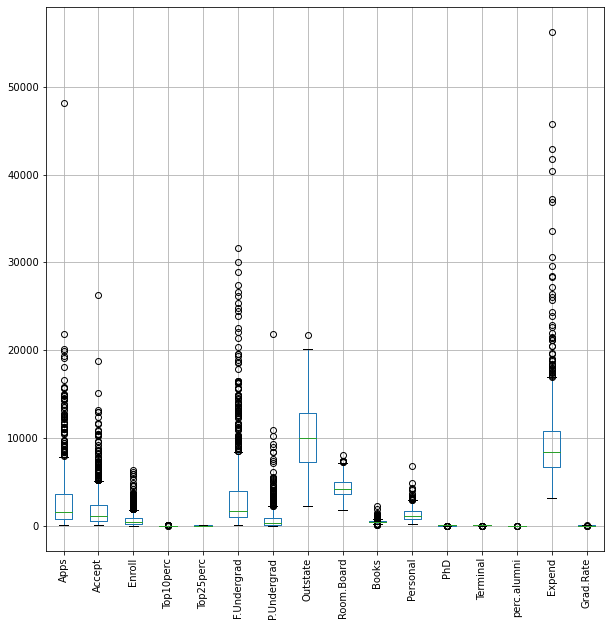

In [45]:
plt.figure(figsize=(10,10))
df_Edu_without_Name.boxplot()
plt.xticks(rotation = 90)
plt.show()

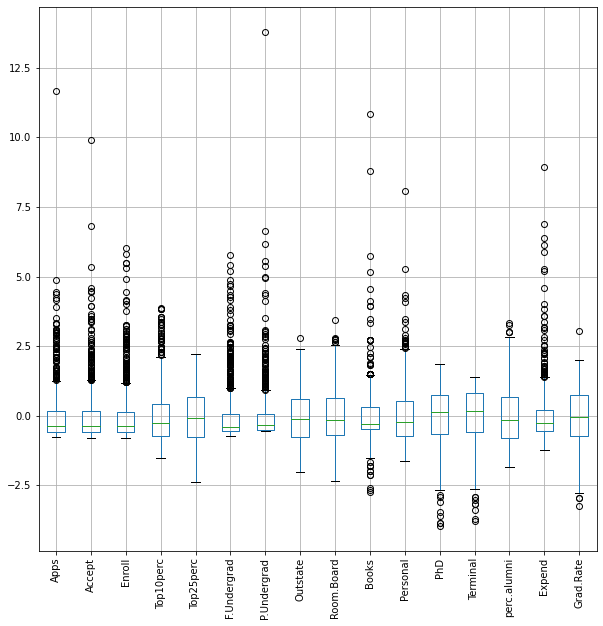

In [46]:
plt.figure(figsize=(10,10))
df_Edu_Scaled.boxplot()
plt.xticks(rotation = 90)
plt.show()

# Extract the eigenvalues and eigenvectors.[print both]


In [47]:
eigvals, eigvecs = np.linalg.eig(cov_matrix)

In [48]:
print('\n Eigen Values \n %s', eigvals )
print('\n')
print('Eigen Vectors \n %s', eigvecs)


 Eigen Values 
 %s [5.33228591 4.21705548 1.12926103 0.99630292 0.93227363 0.71580282
 0.59224672 0.57839348 0.49548878 0.35019548 0.02303036 0.03694902
 0.08821187 0.22063972 0.16789704 0.14458431]


Eigen Vectors 
 %s [[-2.99265050e-01 -2.89941512e-01  1.20959254e-01 -2.56018476e-01
   1.54516740e-02  2.15819680e-02  9.77660829e-02 -5.99345318e-02
  -1.08850458e-01  1.09422781e-02  3.58126169e-01  4.59072189e-01
   1.35159630e-01 -2.52526569e-02  5.96232727e-01 -8.35092009e-02]
 [-2.64742145e-01 -3.38691350e-01  1.61158257e-01 -2.33547087e-01
   6.40025146e-02 -3.56558862e-02  2.18763511e-02 -9.77802493e-02
  -1.48179251e-01 -4.96219052e-02 -5.42640151e-01 -5.20375479e-01
  -1.49278860e-01  1.45986924e-01  2.90274438e-01 -4.18607058e-02]
 [-2.38536894e-01 -3.76834180e-01  1.31995460e-01 -1.31216518e-01
  -5.86724795e-02 -2.79262106e-02 -4.58133610e-02  4.78420009e-03
  -1.18992193e-01 -5.49877543e-02  6.10187930e-01 -4.04788937e-01
   2.68041760e-02 -9.72744610e-03 -4.45567876e-01  

# Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features


In [49]:
tot = sum(eigvals)
var_exp = [( i /tot ) * 100 for i in sorted(eigvals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.28389529  59.60657104  66.65536898  72.87424819  78.69345937
  83.16146923  86.85824734  90.46855416  93.56137344  95.74727829
  97.12450177  98.17250774  99.07499669  99.6256113   99.85624548
 100.        ]


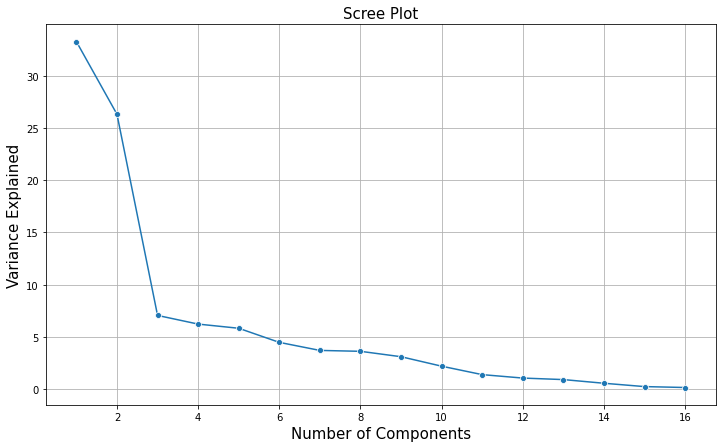

In [50]:
plt.figure(figsize=(12,7))
sns.lineplot(y = var_exp, x = range(1, len(var_exp)+1), marker = "o" )
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

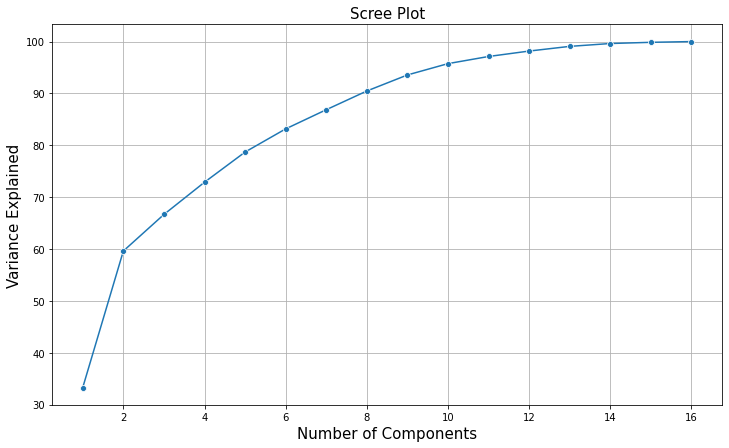

In [51]:
plt.figure(figsize=(12,7))
sns.lineplot(y = cum_var_exp, x = range(1, len(cum_var_exp)+1), marker = "o" )
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [52]:
from sklearn.decomposition import PCA
# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 33 to 8)
pca = PCA(n_components=8, random_state=123)
df_pca = pca.fit_transform(df_Edu_Scaled)
df_pca.transpose() # Component output

array([[-1.33011379, -2.36562347, -1.64145095, ..., -0.72904954,
         7.25994257, -0.25831949],
       [ 0.80873645,  0.0440985 , -0.73766632, ...,  0.03606253,
        -2.99760589,  0.14066896],
       [ 0.13920228,  1.47116433, -0.7375128 , ...,  0.06150116,
         1.65431103, -0.93171247],
       ...,
       [-0.53866549, -1.55346133, -0.70285517, ...,  0.85001161,
        -2.8185547 ,  0.56660075],
       [-0.29376899, -0.20693137, -0.03274198, ..., -0.92266344,
        -0.81325296,  1.37327169],
       [-0.84668874,  0.73371221,  0.53267892, ...,  0.70461938,
         0.46511708, -0.45412966]])

In [53]:
pca.components_

array([[ 0.29926505,  0.26474214,  0.23853689,  0.34048201,  0.33744577,
         0.21936401,  0.0737743 ,  0.25338768,  0.22632282,  0.07210123,
        -0.01185623,  0.32918739,  0.32554092,  0.16666767,  0.29223001,
         0.22761173],
       [ 0.28994151,  0.33869135,  0.37683418, -0.15384468, -0.11718215,
         0.39464567,  0.32033142, -0.30788423, -0.1877949 ,  0.04835094,
         0.24271365, -0.01075472, -0.02113951, -0.29321552, -0.18262957,
        -0.22860892],
       [-0.12095925, -0.16115826, -0.13199546,  0.07477952,  0.03952901,
        -0.10111087,  0.10666356,  0.03803271,  0.14908733,  0.75618029,
         0.48694961, -0.02202622,  0.04013372, -0.12418098,  0.17204528,
        -0.18303167],
       [ 0.25601848,  0.23354709,  0.13121652, -0.00889606, -0.05703545,
         0.07372872, -0.19944701,  0.12773791,  0.20553648,  0.30381766,
        -0.19018186, -0.53125303, -0.50351163,  0.01661616,  0.05674751,
         0.2964096 ],
       [ 0.01545167,  0.06400251, -0

In [54]:
pca.explained_variance_ratio_

array([0.33283895, 0.26322676, 0.07048798, 0.06218879, 0.05819211,
       0.0446801 , 0.03696778, 0.03610307])

In [55]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df_Edu_Scaled))
df_pca_loading.shape

(8, 16)

In [56]:
df_pca_loading.head(8)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,perc.alumni,Expend,Grad.Rate
0,0.299265,0.264742,0.238537,0.340482,0.337446,0.219364,0.073774,0.253388,0.226323,0.072101,-0.011856,0.329187,0.325541,0.166668,0.292230,0.227612
1,0.289942,0.338691,0.376834,-0.153845,-0.117182,0.394646,0.320331,-0.307884,-0.187795,0.048351,0.242714,-0.010755,-0.021140,-0.293216,-0.182630,-0.228609
2,-0.120959,-0.161158,-0.131995,0.074780,0.039529,-0.101111,0.106664,0.038033,0.149087,0.756180,0.486950,-0.022026,0.040134,-0.124181,0.172045,-0.183032
3,0.256018,0.233547,0.131217,-0.008896,-0.057035,0.073729,-0.199447,0.127738,0.205536,0.303818,-0.190182,-0.531253,-0.503512,0.016616,0.056748,0.296410
4,0.015452,0.064003,-0.058672,-0.394564,-0.421000,-0.049152,0.270750,0.232816,0.600657,-0.017998,-0.251380,0.114653,0.188740,-0.220578,0.055017,-0.067991
5,-0.021582,0.035656,0.027926,-0.078411,0.031601,0.023068,-0.231748,-0.198312,-0.169275,0.536834,-0.560509,0.216773,0.282005,-0.037605,-0.367413,0.053206
6,-0.097766,-0.021876,0.045813,-0.257418,-0.199034,0.054052,0.364940,0.040380,-0.085983,0.127921,0.202370,0.001953,0.045646,0.669660,-0.260053,0.401724
7,-0.059935,-0.097780,0.004784,0.168643,0.130475,0.038262,0.562862,0.011878,-0.135954,0.095592,-0.483193,-0.178905,-0.151055,0.253324,0.240311,-0.430229


# Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only).


In [57]:
np.round(eigvecs[0],2)

array([-0.3 , -0.29,  0.12, -0.26,  0.02,  0.02,  0.1 , -0.06, -0.11,
        0.01,  0.36,  0.46,  0.14, -0.03,  0.6 , -0.08])

# Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?


In [60]:
tot = sum(eigvals)
var_exp = [( i /tot ) * 100 for i in sorted(eigvals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.28389529  59.60657104  66.65536898  72.87424819  78.69345937
  83.16146923  86.85824734  90.46855416  93.56137344  95.74727829
  97.12450177  98.17250774  99.07499669  99.6256113   99.85624548
 100.        ]


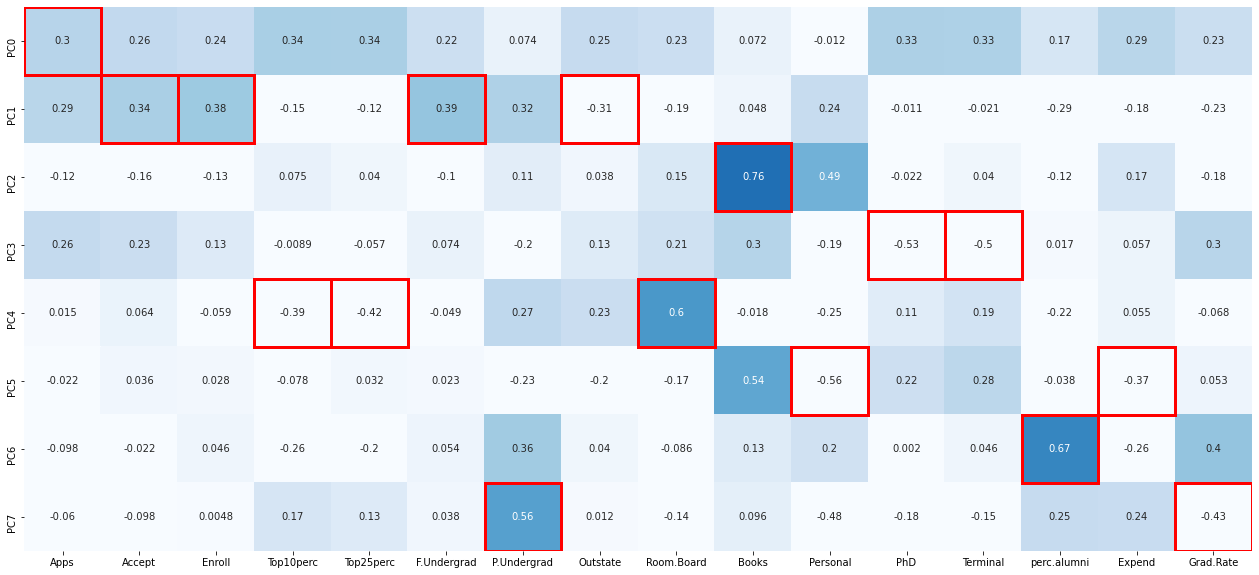

In [59]:
from matplotlib.patches import Rectangle
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

# Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

The business implication of using Principal Component Analysis is that from using 16 features we have not only reduced the number of features but also minimized the problem of multicollinearity within the dataset.  By plotting each principal component alongside the original features, we were able to capture the features with high correlation to principal components.  By capturing and grouping those features, we were able to reduce the features and also the multi-collinearity associated with it.